#Conversión con Programación clasica/regular

Donde el programador:
*  Crea las reglas 
*  Crea la logica de como se aplican esas reglas.

Ejemplo: software para convertir grados Celsius a Fahrenheit:

Fah = Celsius * 1.8 + 32



In [1]:
#creamos una funcion para convertir
def f_conv_cels_fah (p_celsius):
  fah= p_celsius*1.8 + 32
  return fah

def f_conv_fah_cels(p_fahrenheit):
  cels = ((p_fahrenheit-32)*5)/9
  return cels

print('50° Celsius= ',
      f_conv_cels_fah(50),
      '° Fahrenheit ')
print('50° Fahrenheit= ',
      f_conv_fah_cels(50),
      '° Celsius ')

50° Celsius=  122.0 ° Fahrenheit 
50° Fahrenheit=  10.0 ° Celsius 


*  pero y si no conocemos las reglas?
*  y si no es la logica es muy compleja o peor es muy variable?


##1. Importando librerias.

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

##2. Definiendo los parametros de entrada y salida (capas)
---
Usaremos 10 datos para este ejercicio.

In [3]:
celsius    = np.array([-100, -55, -40, -23 , -10,  0,  8, 15, 22,  38], dtype=float)   #parametros de entrada
fahrenheit = np.array([-148, -67, -40, -9.4, 14, 32, 46, 59, 72, 100], dtype=float) #parametros de salida 

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/iFePax/DeepLearning/main/Datasets/Data_Celsius-Fahren%C3%A7heit.csv")
df.head()

,celsius,fahrenheit
0,368.88210,695.98778
1,58.81090,137.85962
2,239.92880,463.87184
3,55.81605,132.46889
4,427.28610,801.11498


In [5]:
df.shape

(999, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   celsius     999 non-null    float64
 1   fahrenheit  999 non-null    float64
dtypes: float64(2)
memory usage: 15.7 KB


Notas (errores en la data):


*   Muy pocos datos 
*   Sin datos flotantes
*   Rango muy pequeño de datos




##3. Creando la red neuronal

---



*   Usamos Keras como libreria de alto nivel (facilita mucho la creación de redes neuronales)
*   usaremos un modelo secuencial (una red simple), hay más modelos, ejemplo: CNN, LSTM/ RNN, GAN, BERT
*   crearemos 3 capas densas, que son aquellas que tiene conexiones con todas las neuronas de la siguiente capa, donde:
    *   Units= cantidad de neuronas
    *   input_shape= cantidad de nueronas de entrada   

In [7]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

###3.1 Compilamos la red:


*   Usaremos el optimizador ADAM, hay otros más complejos como RELU, SOFTMAX...etc...es quien le dice a la red como ajustar los pesos y los sesgos (le dice como aprender y no desaprender)
*  Definiremos una tasa de aprendizaje de 0.1 (entre más pequeño el número el ajuste es menor y más tiempo dura en aprender).
*   tomaremos la una función de calculo de perdida del aprendizaje llamada "MEAN_SQUARED_ERROR- error cuadradico medio", que es "una poca cantidad de error grandes es PEOR que una gran cantidad de errores pequeños" 



In [8]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

##4. Entrenando

In [9]:
print("Comenzando entrenamiento...")
historial = modelo.fit(df['celsius'], df['fahrenheit'], epochs=1000, verbose=True)
print("Modelo entrenado!")

Comenzando entrenamiento...
Epoch 1/1000
32/32 [==============================] - 1s 1ms/step - loss: 21338.4844
Epoch 2/1000
32/32 [==============================] - 0s 1ms/step - loss: 721.4314
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 317.6463
Epoch 4/1000
32/32 [==============================] - 0s 1ms/step - loss: 292.4957
Epoch 5/1000
32/32 [==============================] - 0s 1ms/step - loss: 281.7656
Epoch 6/1000
32/32 [==============================] - 0s 1ms/step - loss: 270.4170
Epoch 7/1000
32/32 [==============================] - 0s 1ms/step - loss: 258.4247
Epoch 8/1000
32/32 [==============================] - 0s 1ms/step - loss: 246.5506
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 234.6630
Epoch 10/1000
32/32 [==============================] - 0s 1ms/step - loss: 221.5255
Epoch 11/1000
32/32 [==============================] - 0s 1ms/step - loss: 209.7303
Epoch 12/1000
32/32 [==============================] - 

###4.1 Resultados del entrenamiento

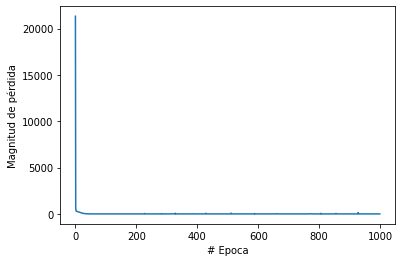

In [11]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

 ## 5. Generamos una predicción

In [12]:
v_celsius= 40
print("Hagamos una predicción!")
resul_IA   = modelo.predict([v_celsius])
result_real= f_conv_cels_fah(v_celsius)
dif        = 100-(resul_IA*100/result_real)
print('Celsius= ',v_celsius, '° = Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Celsius=  40 ° = Fahrenheit: 
IA:  [[104.00008]] 
Regular:  104.0 
Dif %: [[-7.6293945e-05]]


Prediccion de grados fahrenheit


In [13]:
v_fahrenheit= 40
print("Hagamos una predicción!")
resul_IA   = modelo.predict([v_fahrenheit])
result_real= f_conv_fah_cels(v_fahrenheit)
dif        = 100-(resul_IA*100/result_real)
print('Celsius= ',v_fahrenheit, '° = Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Celsius=  40 ° = Fahrenheit: 
IA:  [[104.00008]] 
Regular:  4.444444444444445 
Dif %: [[-2240.0017]]


##6. Conociendo que sesgos y pesos resultantes


---
Una vez termina de entrenar las neuronas quedan con pesos y sesgos 




In [14]:
print("Variables internas del modelo")
print('peso: ',capa.get_weights()[0])
print('sesgo: ',capa.get_weights()[1])

Variables internas del modelo
peso:  [[1.8000025]]
sesgo:  [31.999979]


la red sin decirle las reglas ni la logica pudo ella sola generar un algorimo para calcular un valor aproximado del 99% de acertabilidad.

fahr= cels *1.8 + 32

y= mx + b  (regresión lineal)

 ## 7. ¿Que sucede si agregamos mas neuromas y mas capas?

###7.1 Creamos un modelo con dos capas ocultas

In [15]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])  # capa DENSA con 3 neuronas y el entra información de 1 capa
oculta2 = tf.keras.layers.Dense(units=3)                   # capa DENSA con 3 neuronas
salida  = tf.keras.layers.Dense(units=1)                    # capa de salida con 1 neurona
#creamos el modelo con las 4 capas (recuerden 1 que la de la parametros no hace falta definirla)
modelo_v2 = tf.keras.Sequential([oculta1, oculta2, salida])

In [16]:
# compilamos
modelo_v2.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [17]:
#entrenamos
print("Comenzando entrenamiento...")
historial_V2 = modelo.fit(df['celsius'], df['fahrenheit'], epochs=1000, verbose=True)
print("Modelo_v2  entrenado!")

Comenzando entrenamiento...
Epoch 1/1000
32/32 [==============================] - 0s 1ms/step - loss: 3.0699e-06
Epoch 2/1000
32/32 [==============================] - 0s 1ms/step - loss: 2.2521e-06
Epoch 3/1000
32/32 [==============================] - 0s 1ms/step - loss: 2.2060e-07
Epoch 4/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.5214e-05
Epoch 5/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 6/1000
32/32 [==============================] - 0s 1ms/step - loss: 1.6518
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.1270
Epoch 8/1000
32/32 [==============================] - 0s 1ms/step - loss: 28.4726
Epoch 9/1000
32/32 [==============================] - 0s 1ms/step - loss: 18.7549
Epoch 10/1000
32/32 [==============================] - 0s 1ms/step - loss: 3.4114
Epoch 11/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4219
Epoch 12/1000
32/32 [==============================] - 0s 2ms

###7.2 Resultados del entrenamiento

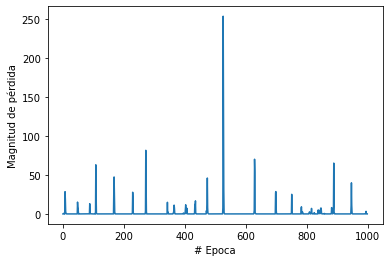

In [18]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial_V2.history["loss"])

###7.3. Conociendo que sesgos y pesos resultantes


---
Una vez termina de entrenar las neuronas quedan con pesos y sesgos 


In [19]:
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-0.3999641, -0.8802191, -1.1442163]], dtype=float32), array([0., 0., 0.], dtype=float32)]
[array([[ 0.9664774 , -0.98586416, -0.47123432],
       [ 0.33174968, -0.21327186, -0.9960799 ],
       [-0.3487904 ,  0.24310088, -0.0457437 ]], dtype=float32), array([0., 0., 0.], dtype=float32)]
[array([[-0.9400334 ],
       [-0.75600994],
       [-0.9187465 ]], dtype=float32), array([0.], dtype=float32)]


###7.4. Generamos una predicción

In [20]:
v_celsius= 50
print("Hagamos una predicción!")
resul_IA   = modelo_v2.predict([v_celsius])
result_real= f_conv_cels_fah(v_celsius)
dif        = 100-(resul_IA*100/result_real)
print('Celsius= ',v_celsius, '° = Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Celsius=  50 ° = Fahrenheit: 
IA:  [[-49.689697]] 
Regular:  122.0 
Dif %: [[140.72926]]


In [21]:
v_fahrenheit= 40
print("Hagamos una predicción!")
resul_IA   = modelo_v2.predict([v_fahrenheit])
result_real= f_conv_fah_cels(v_fahrenheit)
dif        = 100-(resul_IA*100/result_real)
print('Celsius= ',v_fahrenheit, '° = Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Celsius=  40 ° = Fahrenheit: 
IA:  [[-39.751762]] 
Regular:  4.444444444444445 
Dif %: [[994.4146]]
